# Setup

## Step-by-Step Guide for Anaconda Setup

To ensure compatibility and avoid package conflicts, it's recommended to create a new conda environment with a specific Python version. Here are the steps to do this:

### 1. Install Anaconda
First, if you don't already have Conda installed, you'll need to install either Miniconda or Anaconda:

- [Download Anaconda](https://www.anaconda.com/products/distribution)

### 2. Create a New Conda Environment

#### For macOS, Linux, and Windows:
1. Open your terminal or command prompt.
2. Create a new environment with Python 3.8:

```sh
conda create -n FAC python=3.8
```

3.	Activate the new environment:

```sh
conda activate FAC
```

<!-- 4. Install the required python libraries

```sh
pip install -r requirements.txt
``` -->

## Facer

First thing after getting our Anaconda environment ready, we have to ensure that we have the proper models working and running for inference.

##### We install Facer (*https://github.com/FacePerceiver/facer*) by using `pip install`

To make it work properly we will need to have git-lfs (Git Large File Storage) installed first

**macOS**

To install Git LFS on macOS, use Homebrew:
```sh
brew install git-lfs
```

**Linux**

To install Git LFS on Linux, use APT:
```sh
sudo apt-get install git-lfs
```

**Windows**

To install Git LFS on Windows, download the installer from the [Git LFS website](https://git-lfs.github.com/).

After installing Git LFS, run the following command in command prompt to initialize it (OS agnostic):
```sh
git lfs install
```

And now we should be ready to go with the needed instalations.

#### Facer installation will handle the installation of the required packages for the facer program

In [ ]:
pip install git+https://github.com/FacePerceiver/facer.git@main

## Warning!

Facer is [CUDA](https://docs.nvidia.com/cuda/doc/index.html) dependent and it means that users without a NVIDIA GPU won't be able to run the code unless you provide changes in facer native file 'classification.py': 
1. at line **62** from `self.cuda().float()` to `self.cpu().float()`
2. at line **141** from `model.cuda()` to `model.cpu()`

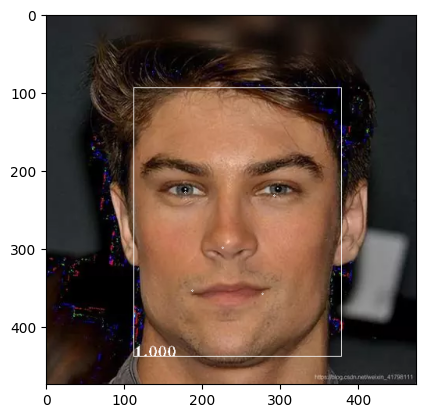

In [6]:
import facer
import sys
import torch
import numpy as np


device = "cpu"

# image: 1 x 3 x h x w
image = facer.hwc2bchw(facer.read_hwc("data/boy.jpg")).to(device=device)

face_detector = facer.face_detector("retinaface/mobilenet", device=device)
with torch.inference_mode():
    faces = face_detector(image)

facer.show_bchw(facer.draw_bchw(image.clone(), faces))

In [7]:
face_attr = facer.face_attr("farl/celeba/224", device=device)
with torch.inference_mode():
    faces = face_attr(image, faces)

labels = face_attr.labels
face1_attrs = faces["attrs"][0] # get the first face's attributes

print(labels)

for prob, label in zip(face1_attrs, labels):
    if prob > 0.5:
        print(label, prob.item())

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
Arched_Eyebrows 0.7756748199462891
Attractive 0.6824451088905334
Bushy_Eyebrows 0.9928953051567078
Male 0.9940908551216125
No_Beard 0.9334998726844788
Wavy_Hair 0.6409828662872314
Young 0.9852430820465088
